In [21]:
import json

defects4j_buggy_functions = []
with open("../../benchmarks/defects4j/defects4j_f2f_bugs_with_ir1.jsonl", "r") as f:
    defects4j_buggy_functions = [json.loads(line) for line in f]
    defects4j_buggy_functions = [b["buggy_code"] for b in defects4j_buggy_functions if "buggy_code" in b]

gitbugjava_buggy_functions = []
with open("../../benchmarks/gitbugjava/gitbugjava_ir1.jsonl", "r") as f:
    gitbugjava_buggy_functions = [json.loads(line) for line in f]
    gitbugjava_buggy_functions = [b["buggy_code"] for b in gitbugjava_buggy_functions if "buggy_code" in b]

humanevaljava_buggy_functions = []
with open("../../benchmarks/humanevaljava/humaneval_f2f_bugs_with_ir1.jsonl", "r") as f:
    humanevaljava_buggy_functions = [json.loads(line) for line in f]
    humanevaljava_buggy_functions = [b["buggy_code"] for b in humanevaljava_buggy_functions if "buggy_code" in b]

<Figure size 640x480 with 0 Axes>

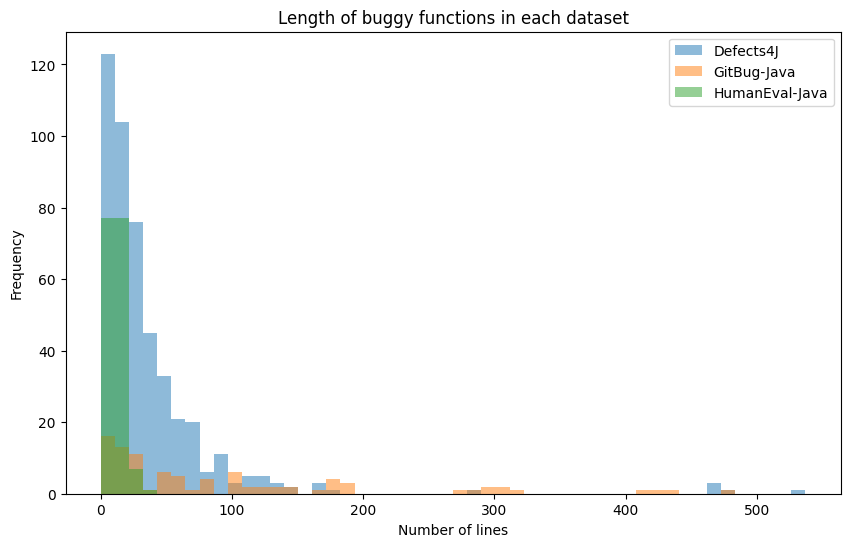

In [66]:
import matplotlib.pyplot as plt

# Combine all lengths into a single list
all_lengths = [len(b.splitlines()) for b in defects4j_buggy_functions] + \
              [len(b.splitlines()) for b in gitbugjava_buggy_functions] + \
              [len(b.splitlines()) for b in humanevaljava_buggy_functions]

# Calculate the bin edges
bins = plt.hist(all_lengths, bins=50, alpha=0)[1]
plt.clf()

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms with the same bins
ax.hist([len(b.splitlines()) for b in defects4j_buggy_functions], bins=bins, alpha=0.5, label="Defects4J")
ax.hist([len(b.splitlines()) for b in gitbugjava_buggy_functions], bins=bins, alpha=0.5, label="GitBug-Java")
ax.hist([len(b.splitlines()) for b in humanevaljava_buggy_functions], bins=bins, alpha=0.5, label="HumanEval-Java")

ax.set_xlabel("Number of lines")
ax.set_ylabel("Frequency")
ax.set_title("Length of buggy functions in each dataset")
ax.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

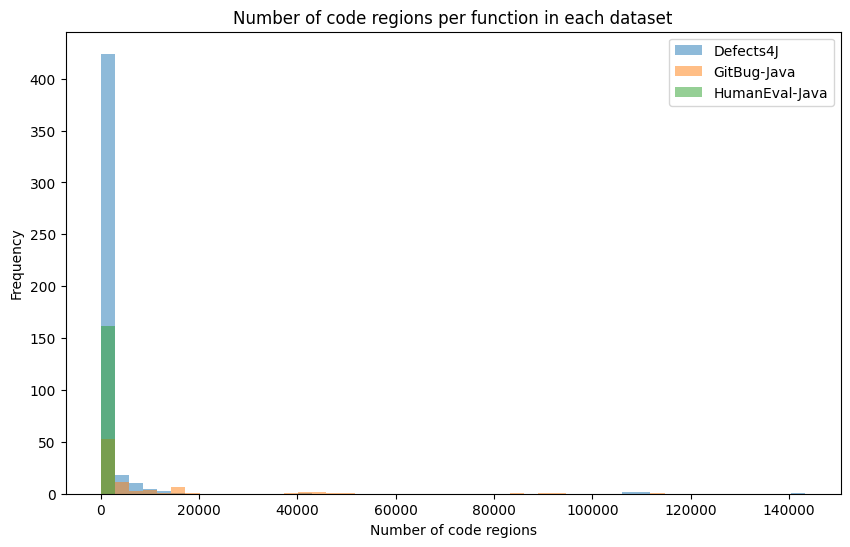

In [61]:
import matplotlib.pyplot as plt
from fl import fault_localizer

# Combine all lengths into a single list
all_lengths = [len(fault_localizer(b)) for b in defects4j_buggy_functions] + \
              [len(fault_localizer(b)) for b in gitbugjava_buggy_functions] + \
              [len(fault_localizer(b)) for b in humanevaljava_buggy_functions]

# Calculate the bin edges
bins = plt.hist(all_lengths, bins=50, alpha=0)[1]

# Clear the current figure
plt.clf()

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms with the same bins
ax.hist([len(fault_localizer(b)) for b in defects4j_buggy_functions], bins=bins, alpha=0.5, label="Defects4J")
ax.hist([len(fault_localizer(b)) for b in gitbugjava_buggy_functions], bins=bins, alpha=0.5, label="GitBug-Java")
ax.hist([len(fault_localizer(b)) for b in humanevaljava_buggy_functions], bins=bins, alpha=0.5, label="HumanEval-Java")

ax.set_xlabel("Number of code regions")
ax.set_ylabel("Frequency")
ax.set_title("Number of code regions per function in each dataset")
ax.legend()

plt.show()

Defects4J Descriptive Statistics:
       Number of lines  Number of code regions
count       467.000000              467.000000
mean         36.955032             2249.171306
std          56.995596            12249.396521
min           0.000000                0.000000
25%          10.000000               36.000000
50%          22.000000              210.000000
75%          43.000000              861.000000
max         537.000000           143380.000000

GitBug-Java Descriptive Statistics:
       Number of lines  Number of code regions
count        90.000000               90.000000
mean         94.588889            10529.522222
std         111.950922            22051.677482
min           3.000000                1.000000
25%          12.500000               60.750000
50%          52.500000             1300.500000
75%         131.750000             8484.750000
max         477.000000           113050.000000

HumanEval-Java Descriptive Statistics:
       Number of lines  Number of code regi

<Figure size 640x480 with 0 Axes>

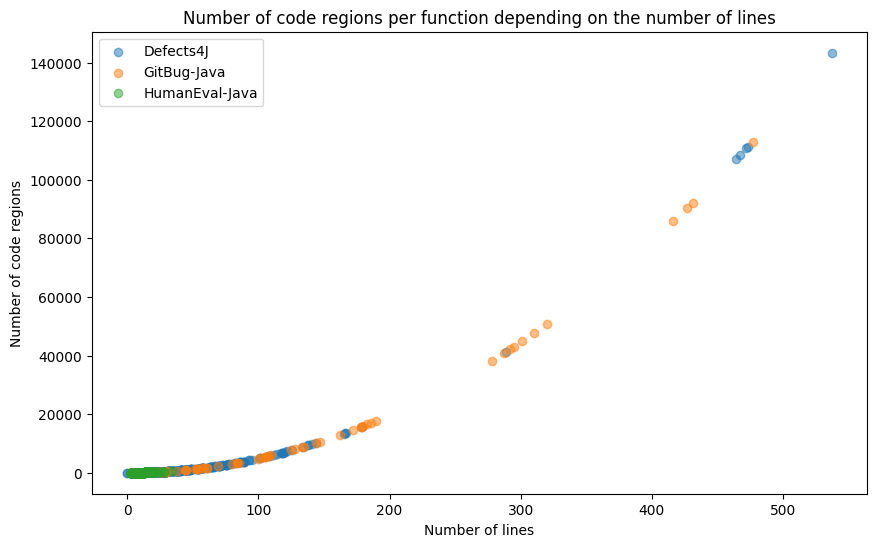

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from fl import fault_localizer

# Calculate the number of lines and the number of code regions for each function
defects4j_data = [(len(b.splitlines()), len(fault_localizer(b))) for b in defects4j_buggy_functions]
gitbugjava_data = [(len(b.splitlines()), len(fault_localizer(b))) for b in gitbugjava_buggy_functions]
humanevaljava_data = [(len(b.splitlines()), len(fault_localizer(b))) for b in humanevaljava_buggy_functions]

# Create DataFrames
defects4j_df = pd.DataFrame(defects4j_data, columns=["Number of lines", "Number of code regions"])
gitbugjava_df = pd.DataFrame(gitbugjava_data, columns=["Number of lines", "Number of code regions"])
humanevaljava_df = pd.DataFrame(humanevaljava_data, columns=["Number of lines", "Number of code regions"])

# Calculate descriptive statistics
defects4j_stats = defects4j_df.describe()
gitbugjava_stats = gitbugjava_df.describe()
humanevaljava_stats = humanevaljava_df.describe()

print("Defects4J Descriptive Statistics:")
print(defects4j_stats)
print("\nGitBug-Java Descriptive Statistics:")
print(gitbugjava_stats)
print("\nHumanEval-Java Descriptive Statistics:")
print(humanevaljava_stats)

# Clear the current figure
plt.clf()

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot scatter plots
ax.scatter(defects4j_df["Number of lines"], defects4j_df["Number of code regions"], alpha=0.5, label="Defects4J")
ax.scatter(gitbugjava_df["Number of lines"], gitbugjava_df["Number of code regions"], alpha=0.5, label="GitBug-Java")
ax.scatter(humanevaljava_df["Number of lines"], humanevaljava_df["Number of code regions"], alpha=0.5, label="HumanEval-Java")

ax.set_xlabel("Number of lines")
ax.set_ylabel("Number of code regions")
ax.set_title("Number of code regions per function depending on the number of lines")
ax.legend()

plt.show()